# Market Basket Analysis

Hello, My name is Muhammad Abdullah. In this project we are going analyze a bunch of products in the store to check the the most selling item and the least selling item, we then check which country these item sell the most.

And after that we're gonna distinguish by date, month and weeks. And then we are going to visualize all of them by answering different questions. 

These answers will help us to understand the data more clearly and and help us to maximize our future decisions.

In [1]:
!pip install numpy

In [3]:
!pip install pandas --upgrade --quiet


In [4]:
!pip install matplotlib

In [5]:
!pip install seaborn

In [6]:
import numpy as np

In [7]:
import pandas as pd 


C:\Users\computercity\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Downloading the Dataset

**TODO** I've download this project from github with this link (https://raw.githubusercontent.com/MuhammadAbdullah9646/Market-Basket-Analysis-1/main/Market%20Basket%20Analysis%201.csv).

I downloaded the file on my computer because this raw file contains more than 52,000 lines of data and contain alot of redundant values in it so edit it on excel and I only extract the data which I need.(I uploaded the edited file on my profile if anyone need it they can download it from my profile)..

In [15]:
market_df =  df = pd.read_csv('https://raw.githubusercontent.com/MuhammadAbdullah9646/Market-Basket-Analysis-1/main/Market%20Basket%20Analysis%201.csv')

In [16]:
market_df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536387,CHILLI LIGHTS,192,12/1/2010 9:58,3.82,16029,United Kingdom
1,536387,LIGHT GARLAND BUTTERFILES PINK,192,12/1/2010 9:58,3.37,16029,United Kingdom
2,536387,WOODEN OWLS LIGHT GARLAND,192,12/1/2010 9:58,3.37,16029,United Kingdom
3,536477,BLACK RECORD COVER FRAME,480,12/1/2010 12:27,3.39,16210,United Kingdom
4,536581,JUMBO BAG RED RETROSPOT,200,12/1/2010 16:19,1.65,13777,United Kingdom
...,...,...,...,...,...,...,...
793,581457,BLACK HEART CARD HOLDER,324,12/8/2011 18:43,2.31,18102,United Kingdom
794,581457,CREAM HEART CARD HOLDER,324,12/8/2011 18:43,3.39,18102,United Kingdom
795,581457,WALL ART KEEP CALM,698,12/8/2011 18:43,4.15,18102,United Kingdom
796,581457,WOOD BLACK BOARD ANT WHITE FINISH,204,12/8/2011 18:43,4.80,18102,United Kingdom


Reason for changing this value because the value is too high and it creating redundancy

In [17]:
market_df.at[797, 'Quantity'] = 3101

In [18]:
market_df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536387,CHILLI LIGHTS,192,12/1/2010 9:58,3.82,16029,United Kingdom
1,536387,LIGHT GARLAND BUTTERFILES PINK,192,12/1/2010 9:58,3.37,16029,United Kingdom
2,536387,WOODEN OWLS LIGHT GARLAND,192,12/1/2010 9:58,3.37,16029,United Kingdom
3,536477,BLACK RECORD COVER FRAME,480,12/1/2010 12:27,3.39,16210,United Kingdom
4,536581,JUMBO BAG RED RETROSPOT,200,12/1/2010 16:19,1.65,13777,United Kingdom
...,...,...,...,...,...,...,...
793,581457,BLACK HEART CARD HOLDER,324,12/8/2011 18:43,2.31,18102,United Kingdom
794,581457,CREAM HEART CARD HOLDER,324,12/8/2011 18:43,3.39,18102,United Kingdom
795,581457,WALL ART KEEP CALM,698,12/8/2011 18:43,4.15,18102,United Kingdom
796,581457,WOOD BLACK BOARD ANT WHITE FINISH,204,12/8/2011 18:43,4.80,18102,United Kingdom


## Data Preparation and Cleaning
TODO -  Firstly we are going to load the file using pd.read_csv. Then we are going to check this data using pd.describe(), pd.info() and other pandas functions if it contains any kind of redundancy or missing values

In [19]:
market_df.describe()

,BillNo,Quantity,Price,CustomerID
count,798.000000,798.000000,798.000000,798.000000
mean,560819.860902,345.058897,2.772018,15889.989975
std,11981.399611,304.915687,1.548894,1770.846713
min,536387.000000,180.000000,1.500000,12415.000000
25%,552566.000000,200.000000,1.790000,14646.000000
50%,562789.000000,240.000000,2.100000,16013.000000
75%,569815.000000,360.000000,3.390000,17450.000000
max,581483.000000,3114.000000,12.480000,18102.000000


In [28]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      798 non-null    int64  
 1   Itemname    798 non-null    object 
 2   Quantity    798 non-null    int64  
 3   Date        798 non-null    object 
 4   Price       798 non-null    float64
 5   CustomerID  798 non-null    int64  
 6   Country     798 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 43.8+ KB


In [29]:
market_df.sample(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
152,547832,JUMBO STORAGE BAG SUKI,200,3/25/2011 16:25,1.65,17511,United Kingdom
603,569839,JUMBO BAG ALPHABET,200,10/6/2011 13:21,1.79,15769,United Kingdom
699,575214,BAKING SET SPACEBOY DESIGN,216,11/9/2011 10:48,4.25,16751,United Kingdom
233,554366,BLACK AND WHITE DOG BOWL,552,5/24/2011 10:24,3.24,17450,United Kingdom
42,540166,JUMBO BAG RED RETROSPOT,200,1/5/2011 12:09,1.65,13629,United Kingdom
13,537509,HAND WARMER BIRD DESIGN,192,12/7/2010 11:41,1.85,13756,United Kingdom
667,573263,JUMBO BAG 50'S CHRISTMAS,200,10/28/2011 12:34,1.79,13694,United Kingdom
93,543831,JUMBO BAG BAROQUE BLACK WHITE,200,2/14/2011 9:57,1.65,15769,United Kingdom
288,556726,WOOD BLACK BOARD ANT WHITE FINISH,204,6/14/2011 11:31,4.80,18102,United Kingdom
271,556255,DOORMAT UNION FLAG,300,6/9/2011 17:27,4.58,18102,United Kingdom


In the market_df.info we seeing the date datatype is object and it shows time in it. we want to change its type and remove the time in order to create months and weeks.

In [30]:
market_df.Date

0       12/1/2010 9:58
1       12/1/2010 9:58
2       12/1/2010 9:58
3      12/1/2010 12:27
4      12/1/2010 16:19
            ...       
793    12/8/2011 18:43
794    12/8/2011 18:43
795    12/8/2011 18:43
796    12/8/2011 18:43
797     12/9/2011 9:15
Name: Date, Length: 798, dtype: object

In [31]:
market_df['Date'] = pd.to_datetime(market_df.Date).dt.date

pd.to_datetime change the datatype of the column into date and at the end dt.date is gonna remove the time in the column

In [32]:
market_df.Date

0      2010-12-01
1      2010-12-01
2      2010-12-01
3      2010-12-01
4      2010-12-01
          ...    
793    2011-12-08
794    2011-12-08
795    2011-12-08
796    2011-12-08
797    2011-12-09
Name: Date, Length: 798, dtype: object

In the market_df.info we also seeing the Itemsame datatype is object and we want to change its type into string

In [33]:
market_df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536387,CHILLI LIGHTS,192,2010-12-01,3.82,16029,United Kingdom
1,536387,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01,3.37,16029,United Kingdom
2,536387,WOODEN OWLS LIGHT GARLAND,192,2010-12-01,3.37,16029,United Kingdom
3,536477,BLACK RECORD COVER FRAME,480,2010-12-01,3.39,16210,United Kingdom
4,536581,JUMBO BAG RED RETROSPOT,200,2010-12-01,1.65,13777,United Kingdom
...,...,...,...,...,...,...,...
793,581457,BLACK HEART CARD HOLDER,324,2011-12-08,2.31,18102,United Kingdom
794,581457,CREAM HEART CARD HOLDER,324,2011-12-08,3.39,18102,United Kingdom
795,581457,WALL ART KEEP CALM,698,2011-12-08,4.15,18102,United Kingdom
796,581457,WOOD BLACK BOARD ANT WHITE FINISH,204,2011-12-08,4.80,18102,United Kingdom


Now, we are going to add some new columns.

In [34]:
market_df['year'] = pd.DatetimeIndex(market_df.Date).year
market_df['month'] = pd.DatetimeIndex(market_df.Date).month
market_df['day'] = pd.DatetimeIndex(market_df.Date).day
market_df['weekday'] = pd.DatetimeIndex(market_df.Date).weekday

In [35]:
market_df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,year,month,day,weekday
0,536387,CHILLI LIGHTS,192,2010-12-01,3.82,16029,United Kingdom,2010,12,1,2
1,536387,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01,3.37,16029,United Kingdom,2010,12,1,2
2,536387,WOODEN OWLS LIGHT GARLAND,192,2010-12-01,3.37,16029,United Kingdom,2010,12,1,2
3,536477,BLACK RECORD COVER FRAME,480,2010-12-01,3.39,16210,United Kingdom,2010,12,1,2
4,536581,JUMBO BAG RED RETROSPOT,200,2010-12-01,1.65,13777,United Kingdom,2010,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...
793,581457,BLACK HEART CARD HOLDER,324,2011-12-08,2.31,18102,United Kingdom,2011,12,8,3
794,581457,CREAM HEART CARD HOLDER,324,2011-12-08,3.39,18102,United Kingdom,2011,12,8,3
795,581457,WALL ART KEEP CALM,698,2011-12-08,4.15,18102,United Kingdom,2011,12,8,3
796,581457,WOOD BLACK BOARD ANT WHITE FINISH,204,2011-12-08,4.80,18102,United Kingdom,2011,12,8,3


## Exploratory Analysis and Visualization

**TODO** - Now We are going to analyze data using pandas, matplotlib and seaborn. In order to understand the data completely we are going to use some visualizations. 

In [36]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

First we are going to generate total revenue for each item

In [37]:
market_df['Revenue'] = market_df.Quantity * market_df.Price

In [38]:
market_df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,year,month,day,weekday,Revenue
0,536387,CHILLI LIGHTS,192,2010-12-01,3.82,16029,United Kingdom,2010,12,1,2,733.44
1,536387,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01,3.37,16029,United Kingdom,2010,12,1,2,647.04
2,536387,WOODEN OWLS LIGHT GARLAND,192,2010-12-01,3.37,16029,United Kingdom,2010,12,1,2,647.04
3,536477,BLACK RECORD COVER FRAME,480,2010-12-01,3.39,16210,United Kingdom,2010,12,1,2,1627.20
4,536581,JUMBO BAG RED RETROSPOT,200,2010-12-01,1.65,13777,United Kingdom,2010,12,1,2,330.00
...,...,...,...,...,...,...,...,...,...,...,...,...
793,581457,BLACK HEART CARD HOLDER,324,2011-12-08,2.31,18102,United Kingdom,2011,12,8,3,748.44
794,581457,CREAM HEART CARD HOLDER,324,2011-12-08,3.39,18102,United Kingdom,2011,12,8,3,1098.36
795,581457,WALL ART KEEP CALM,698,2011-12-08,4.15,18102,United Kingdom,2011,12,8,3,2896.70
796,581457,WOOD BLACK BOARD ANT WHITE FINISH,204,2011-12-08,4.80,18102,United Kingdom,2011,12,8,3,979.20


Now, we going to check most selling item by quantity

In [39]:
most_selling_item = market_df.sort_values('Quantity', ascending=False).head(10)
most_selling_item

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,year,month,day,weekday,Revenue
62,540815,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11,2.10,15749,United Kingdom,2011,1,11,1,6539.40
186,550461,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18,2.10,15749,United Kingdom,2011,4,18,0,6539.40
797,581483,"PAPER CRAFT , LITTLE BIRDIE",3101,2011-12-09,2.08,16446,United Kingdom,2011,12,9,4,6450.08
663,573003,RABBIT NIGHT LIGHT,2400,2011-10-27,2.08,14646,Netherlands,2011,10,27,3,4992.00
762,579498,RABBIT NIGHT LIGHT,2040,2011-11-29,1.79,12798,Japan,2011,11,29,1,3651.60
61,540815,GIN + TONIC DIET METAL SIGN,2000,2011-01-11,1.85,15749,United Kingdom,2011,1,11,1,3700.00
185,550461,GIN + TONIC DIET METAL SIGN,2000,2011-04-18,1.69,15749,United Kingdom,2011,4,18,0,3380.00
182,550461,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-04-18,2.40,15749,United Kingdom,2011,4,18,0,4632.00
60,540815,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11,2.55,15749,United Kingdom,2011,1,11,1,4921.50
772,580363,VINTAGE DOILY JUMBO BAG RED,1500,2011-12-02,1.79,13868,United Kingdom,2011,12,2,4,2685.00


Now, the least selling items

In [40]:
least_selling_item = market_df.sort_values('Quantity', ascending=True).head(10)
least_selling_item

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,year,month,day,weekday,Revenue
99,544183,CERAMIC STRAWBERRY MONEY BOX,180,2011-02-16,2.25,17857,United Kingdom,2011,2,16,2,405.0
429,563590,PANTRY ROLLING PIN,180,2011-08-17,4.02,17450,United Kingdom,2011,8,17,2,723.6
641,572193,BOX OF 6 CHRISTMAS CAKE DECORATIONS,180,2011-10-21,3.75,15061,United Kingdom,2011,10,21,4,675.0
159,548011,STRAWBERRY LUNCH BOX WITH CUTLERY,180,2011-03-29,2.10,14646,Netherlands,2011,3,29,1,378.0
244,554827,STRAWBERRY LUNCH BOX WITH CUTLERY,180,2011-05-26,2.10,14646,Netherlands,2011,5,26,3,378.0
590,569650,VILLAGE SHOW WALL ART,180,2011-10-05,5.35,12415,Australia,2011,10,5,2,963.0
567,569343,KEEP CALM WALL ART,180,2011-10-03,7.45,18102,United Kingdom,2011,10,3,0,1341.0
587,569650,DOG LICENCE WALL ART,180,2011-10-05,5.35,12415,Australia,2011,10,5,2,963.0
575,569570,EDWARDIAN PARASOL BLACK,180,2011-10-05,4.95,16684,United Kingdom,2011,10,5,2,891.0
588,569650,STOP FOR TEA WALL ART,180,2011-10-05,5.35,12415,Australia,2011,10,5,2,963.0


In [41]:
market_df.Country.unique()

array(['United Kingdom', 'Japan', 'Sweden', 'Netherlands', 'Australia',
       'Spain', 'France', 'Germany'], dtype=object)

now we are checking the unique items from the table which item generate most of the revenue

In [58]:
top_unique_items = market_df.groupby(['Itemname', 'month'])[['Quantity', 'Revenue']].sum().reset_index()
top_unique_items = top_unique_items.sort_values('Quantity', ascending=False).head(10)

In [59]:
top_unique_items

,Itemname,month,Quantity,Revenue
425,RABBIT NIGHT LIGHT,11,4692,8461.32
424,RABBIT NIGHT LIGHT,10,4632,8987.28
554,WHITE HANGING HEART T-LIGHT HOLDER,1,3446,9484.20
152,FAIRY CAKE FLANNEL ASSORTED COLOUR,4,3114,6539.40
151,FAIRY CAKE FLANNEL ASSORTED COLOUR,1,3114,6539.40
399,"PAPER CRAFT , LITTLE BIRDIE",12,3101,6450.08
288,JUMBO BAG RED RETROSPOT,11,2770,4950.30
280,JUMBO BAG RED RETROSPOT,3,2500,4125.00
43,BLACK RECORD COVER FRAME,12,2400,8136.00
38,BLACK HEART CARD HOLDER,12,2304,5322.24


In [60]:
top_Rev_items = market_df.groupby(['Itemname', 'month'])[['Quantity', 'Revenue']].sum().reset_index()
top_Rev_items = top_Rev_items.sort_values('Revenue', ascending=False).head(10)


In [45]:
top_Rev_items

,Itemname,month,Quantity,Revenue
554,WHITE HANGING HEART T-LIGHT HOLDER,1,3446,9484.20
424,RABBIT NIGHT LIGHT,10,4632,8987.28
425,RABBIT NIGHT LIGHT,11,4692,8461.32
43,BLACK RECORD COVER FRAME,12,2400,8136.00
508,SET OF TEA COFFEE SUGAR TINS PANTRY,9,1628,7876.96
151,FAIRY CAKE FLANNEL ASSORTED COLOUR,1,3114,6539.40
152,FAIRY CAKE FLANNEL ASSORTED COLOUR,4,3114,6539.40
399,"PAPER CRAFT , LITTLE BIRDIE",12,3101,6450.08
547,VINTAGE UNION JACK MEMOBOARD,2,1008,6431.04
550,VINTAGE UNION JACK MEMOBOARD,12,1008,6431.04


In [46]:
top_average_items = market_df.groupby(['Itemname', 'month'])[['Quantity', 'Revenue']].mean().reset_index()
top_average_items = top_average_items.sort_values('Quantity', ascending=False).head(10)

In [47]:
top_average_items

,Itemname,month,Quantity,Revenue
151,FAIRY CAKE FLANNEL ASSORTED COLOUR,1,3114.0,6539.40
152,FAIRY CAKE FLANNEL ASSORTED COLOUR,4,3114.0,6539.40
399,"PAPER CRAFT , LITTLE BIRDIE",12,3101.0,6450.08
174,GIN + TONIC DIET METAL SIGN,4,2000.0,3380.00
173,GIN + TONIC DIET METAL SIGN,1,2000.0,3700.00
555,WHITE HANGING HEART T-LIGHT HOLDER,4,1930.0,4632.00
542,VINTAGE DOILY JUMBO BAG RED,12,1500.0,2685.00
472,ROUND SNACK BOXES SET OF 4 FRUITS,12,1488.0,3794.40
426,RABBIT NIGHT LIGHT,12,1440.0,2577.60
212,HOMEMADE JAM SCENTED CANDLES,9,1428.0,2427.60


Now, we going to do the same thing but this time we are going to group by the country rather than the item.

In [48]:
top_unique_countries = market_df.groupby('Country')[['Quantity', 'Revenue']].sum().reset_index()
top_unique_countries = top_unique_countries.sort_values('Quantity', ascending=False).head(10)

In [49]:
top_unique_countries

,Country,Quantity,Revenue
7,United Kingdom,236487,671649.26
4,Netherlands,19894,38469.38
0,Australia,8344,22257.20
3,Japan,4776,9679.92
1,France,2616,4682.64
5,Spain,2088,7570.80
6,Sweden,960,2376.00
2,Germany,192,316.80


Down below, we are checking the average number of Quantity and Revenue by Country

In [50]:
average_countries = market_df.groupby('Country')[['Quantity', 'Revenue']].mean().reset_index()
average_countries = average_countries.sort_values('Quantity', ascending=False).head(10)

In [51]:
average_countries

,Country,Quantity,Revenue
3,Japan,1194.000000,2419.980000
7,United Kingdom,348.287187,989.174168
5,Spain,348.000000,1261.800000
1,France,327.000000,585.330000
6,Sweden,320.000000,792.000000
4,Netherlands,310.843750,601.084062
0,Australia,252.848485,674.460606
2,Germany,192.000000,316.800000


We are now using scatterplot to see the total revenue and total quantity by country, after that by itemname

<Axes: title={'center': 'Total Revenue and Quantity by Country'}, xlabel='Quantity', ylabel='Revenue'>

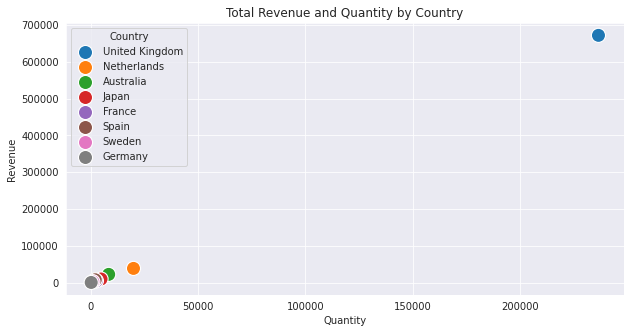

In [52]:
plt.title('Total Revenue and Quantity by Country')
sns.scatterplot(x=top_unique_countries.Quantity, 
                y=top_unique_countries.Revenue, 
                data=top_unique_countries,
                hue='Country',
                s=200)

<Axes: title={'center': 'Total Revenue and Quantity by Items'}, xlabel='Quantity', ylabel='Revenue'>

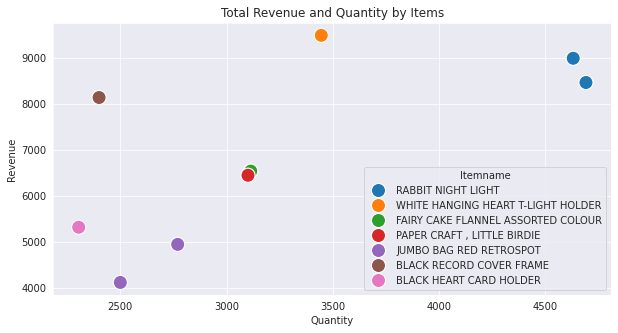

In [53]:
plt.title('Total Revenue and Quantity by Items')
sns.scatterplot(x=top_unique_items.Quantity, 
                y=top_unique_items.Revenue, 
                data=top_unique_items,
                hue='Itemname',
                s=200)

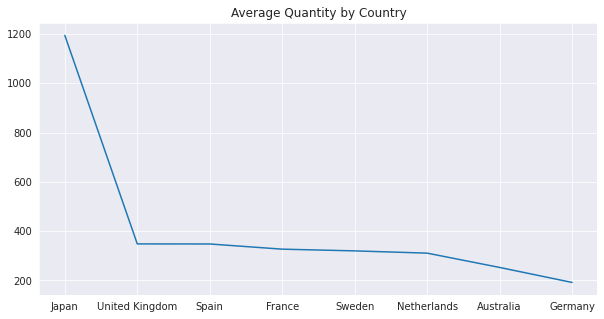

In [54]:
plt.title('Average Quantity by Country')
plt.plot(average_countries.Country, average_countries.Quantity)

(array([4., 3., 0., 3.]),
 array([1428. , 1849.5, 2271. , 2692.5, 3114. ]),
 <BarContainer object of 4 artists>)

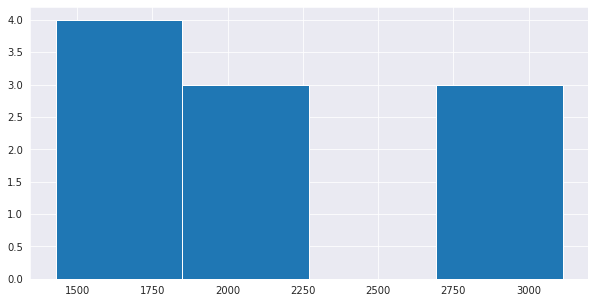

In [55]:
plt.hist(top_average_items.Quantity, bins=4)

## Asking and Answering Questions

**TODO** - Now, for the final step we are going to Answering some interesting questions about the data. 

#### Q1: TODO - what are the top 10 most selling items? demonstrate it by bar chart.

<Axes: xlabel='Quantity', ylabel='Itemname'>

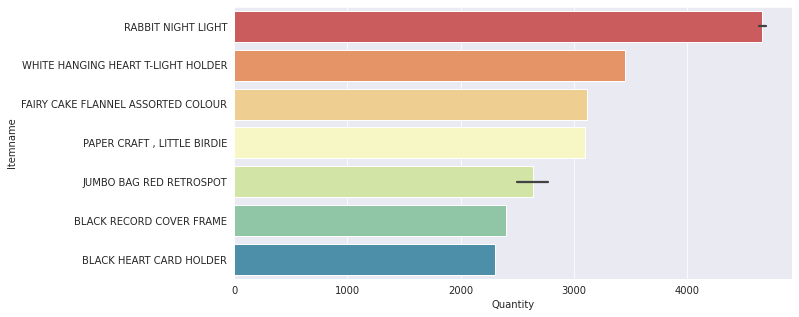

In [67]:
sns.barplot(x=top_unique_items.Quantity, y=top_unique_items.Itemname, hue=top_unique_items.Itemname, palette="Spectral")

the barplot is very simple in the x value we give the quantity and the y value we give them the names and in hue we did the same

#### Q2: TODO - Which Country generate the highest Average Revenue? demonstrate it by pie chart.

([<matplotlib.patches.Wedge at 0x7f4cc63528b0>,
 [Text(0.5989332145814393, 0.9226478225580678, 'Japan'),
  Text(-0.8087225412556558, 0.7456325175748402, 'United Kingdom'),
  Text(-1.0820898577743852, -0.19769051495155546, 'Spain'),
  Text(-0.6486035943099552, -0.8884331024045691, 'France'),
  Text(-0.0706775983175992, -1.0977270503618175, 'Sweden'),
  Text(0.5355513053678082, -0.9608250617666241, 'Netherlands'),
  Text(0.9447019913147393, -0.5635052329889816, 'Australia'),
  Text(1.0906811775361087, -0.14287956105912308, 'Germany')])

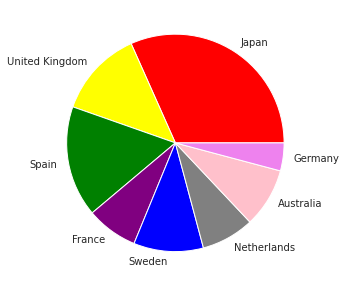

In [61]:
plt.pie(average_countries.Revenue, labels=average_countries.Country, colors=['red', 'yellow', 'green', 'purple', 'blue', 'gray', 'pink', 'violet']) 

like any other plot in matplotlib piechart works the same 

#### Q3: TODO - Which item generate the least Revenue? demonstrate it by chart.

In [62]:
least_selling_items = market_df.groupby(['Itemname', 'month'])[['Quantity', 'Revenue']].sum().reset_index()
least_selling_items = least_selling_items.sort_values('Quantity', ascending=False).tail(10)

In [63]:
least_selling_items

,Itemname,month,Quantity,Revenue
337,KEEP CALM WALL ART,10,180,1341.0
97,DOG LICENCE WALL ART,10,180,963.0
524,STOP FOR TEA WALL ART,10,180,963.0
389,PANTRY ROLLING PIN,8,180,723.6
430,"RECORD FRAME 7"" SINGLE SIZE",11,180,378.0
59,CERAMIC STRAWBERRY MONEY BOX,2,180,405.0
45,BOX OF 6 CHRISTMAS CAKE DECORATIONS,10,180,675.0
525,STRAWBERRY LUNCH BOX WITH CUTLERY,3,180,378.0
526,STRAWBERRY LUNCH BOX WITH CUTLERY,5,180,378.0
539,VILLAGE SHOW WALL ART,10,180,963.0


<Axes: title={'center': 'Least Generated Items'}, xlabel='Revenue', ylabel='Itemname'>

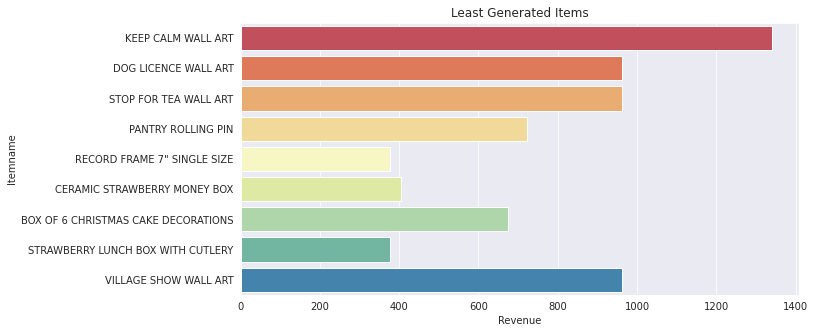

In [64]:
plt.title('Least Generated Items')
sns.barplot(x=least_selling_items.Revenue, y=least_selling_items.Itemname, hue=least_selling_items.Itemname, palette="Spectral")

This barplot is from seaborn library and it works different from the matplotlib library. We give Revenue to the x value it will put the value on the horizontal line and we give item name to the y value put the value on vertical line.

#### Q4: TODO - Which country generate the Most Revenue? demonstrate it by pandas table.

In [65]:
top_unique_countries

,Country,Quantity,Revenue
7,United Kingdom,236487,671649.26
4,Netherlands,19894,38469.38
0,Australia,8344,22257.20
3,Japan,4776,9679.92
1,France,2616,4682.64
5,Spain,2088,7570.80
6,Sweden,960,2376.00
2,Germany,192,316.80


This is simple table and how we did it you can find it on above the page.

#### Q5: TODO - Which item generate the Most Revenue by ? demonstrate it by scatterplot.

<Axes: xlabel='month', ylabel='Revenue'>

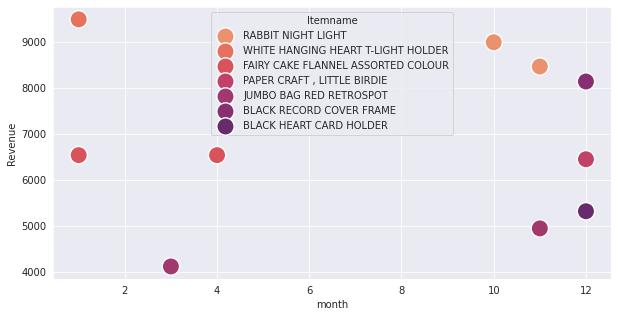

In [66]:
sns.scatterplot(x=top_unique_items.month, y=top_unique_items.Revenue, hue=top_unique_items.Itemname,  palette='flare', s=300)

Like all the seaborn visuals scatterplot works the same. it takes x values for horizontal value and y for the vertical value.

## Inferences and Conclusion

**TODO** - The **'UNITED KINGDOM'** generates the most sales as well as the sell the most Quantity.The most selling item by quantity is RABBIT NIGHT LIGHT with the total quantity of 4692 and by Revenue is WHITE HANGING HEART T-LIGHT HOLDER which generate around like 9484.20$. The least selling item is PANTRY ROLLING PIN with lowest Revenue. 

## References and Future Work
My future work suggestion is that we can filter which sell most in which country like what item sell the most in United Kingdom or in Japan or Australia. And We can do the Same with the least selling item. 

<IPython.core.display.Javascript object>